In [9]:
import math
import warnings
from math import*
from sqlalchemy import create_engine
import numpy as np
import pandas
import pandas as pd
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.io as scio
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime, date, timedelta

1.(二分法)設α是方程x=3/(1+x4)的唯一根。找出一個含有α的區間[a, b]，使得對分法在該區間上收斂於α；並在5×10-8的精度內，用二分法求α。

In [2]:
def myfun_rootfinding_bisection(a,b):
    fa = fun(a)
    fb = fun(b)
    while a <= b:
        c = (a + b) / 2
        fc = fun(c)
        if abs(b-c) < 5*10**(-8):#小于误差容限即为根
            print("方程的根为", c)
            break
        if fa * fc < 0:#左半边
            a = a
            b = c
            fb = fun(b)
            print("解在[", a, ",", b, "]之间")
        elif fb * fc < 0:
            a = c
            b = b
            fa = fun(a)
            print("解在[", a, ",", b, "]之间")
    return c
def fun(x):
    return x**5+x-3
a = -100
b = 100
myfun_rootfinding_bisection(a, b)


解在[ 0.0 , 100 ]之间
解在[ 0.0 , 50.0 ]之间
解在[ 0.0 , 25.0 ]之间
解在[ 0.0 , 12.5 ]之间
解在[ 0.0 , 6.25 ]之间
解在[ 0.0 , 3.125 ]之间
解在[ 0.0 , 1.5625 ]之间
解在[ 0.78125 , 1.5625 ]之间
解在[ 0.78125 , 1.171875 ]之间
解在[ 0.9765625 , 1.171875 ]之间
解在[ 1.07421875 , 1.171875 ]之间
解在[ 1.123046875 , 1.171875 ]之间
解在[ 1.123046875 , 1.1474609375 ]之间
解在[ 1.123046875 , 1.13525390625 ]之间
解在[ 1.129150390625 , 1.13525390625 ]之间
解在[ 1.1322021484375 , 1.13525390625 ]之间
解在[ 1.1322021484375 , 1.13372802734375 ]之间
解在[ 1.132965087890625 , 1.13372802734375 ]之间
解在[ 1.132965087890625 , 1.1333465576171875 ]之间
解在[ 1.132965087890625 , 1.1331558227539062 ]之间
解在[ 1.132965087890625 , 1.1330604553222656 ]之间
解在[ 1.132965087890625 , 1.1330127716064453 ]之间
解在[ 1.1329889297485352 , 1.1330127716064453 ]之间
解在[ 1.1329889297485352 , 1.1330008506774902 ]之间
解在[ 1.1329948902130127 , 1.1330008506774902 ]之间
解在[ 1.1329948902130127 , 1.1329978704452515 ]之间
解在[ 1.132996380329132 , 1.1329978704452515 ]之间
解在[ 1.1329971253871918 , 1.1329978704452515 ]之间
解在[ 1.1329

1.1329975444823503

In [ ]:
2. (牛頓法)利用牛頓法在[1, 1.2]中尋找如下方程
x4-5.4x3+10.56x2-8.954x+2.7951=0的根。

In [3]:
def f(x):
    return x**4-5.4*x**3+10.56*x**2-8.954*x+2.79510

def df(x):
    return 4*x**3-16.2*x**2+21.12*x-8.954

def phi(x):
    return x-f(x)/df(x)

e= 10e-4
N=5000
x0=1.2
iter=0
x1=phi(x0)

while abs(x1-x0)>e and iter<N:
    iter+=1
    x0=x1
    x1=phi(x0)
    if iter==N:
        print('迭代次数超出了上限')
        break

print(x1,iter)


1.1016450182401438 9


In [ ]:
3.（割線法）用割線法求方程x3+2x2+10x-20=0的根，要求|xk+1-xk|<10-6。

In [4]:
def fun(x):
    return x**3+2*x**2+10*x-20
x0=2
x1=1
f0=fun(x0)
f1=fun(x1)#计算F1f0
x2=x1-f1/((f1-f0)/(x1-x0))
iter=0
N=5000
while abs(x2-x1)>5*10**-6 and iter<N:
    iter+=1
    x0=x1
    f0=f1
    x1=x2
    f1=fun(x1)
    x2=x1-f1/((f1-f0)/(x1-x0))
print(x2,iter)


1.3688081078326166 4


In [ ]:
4. (綜合題)請利用提供的成交明細數據計算交易時間間隔。交易時間間隔定義為連續兩次交易之間的等待時間，即
τi=ti-ti-1
其中τi表示第i個交易時間間隔，ti表示第i次交易的發生時刻，ti-1表示第i-1次交易的發生時刻。交易時間間隔是股票交易活躍性的一種度量，與股票價格變化有密切關係[1-3]。短的交易時間間隔，說明市場交易活躍，市場價格變化較大；而長的交易時間間隔，說明市場交易不活躍，市場價格變化較小。
Nobel Prize winner in economics Engle, 最先提出 Autoregressive Conditional Duration (ACD) model to simulate the transaction time interval sequence [4].自此，交易時間間隔的概率分佈和記憶性開始受到研究者的關注。根據文獻報道[5-6]，股票交易時間間隔τ可以用q指數分佈來擬合。現已知q指數分佈的概率密度函數為
p(τ)=μ[1+(1-q)(-μτ)](q/(1-q))
現用極大似然估計法出q指數分佈的參數μ和q。提示：設β= -1/(1-q)，θ=μ/β，將q指數分佈改寫為p(τ)=θβ(1+θτ)-(1+β)，然後用極大似然估計參數 θ 和 β ，進而再求解 μ 和 q 。
用極大似然估計法估計參數 θ 和 β 時，先寫出求解 θ 的方程，然後用二分法估計 θ。
注意事項：
(a)不考慮跨天和跨午間休市的交易時間間隔。
(b)交易時間間隔為0的數據要去掉。
(c)二分法求解的時候，需自己確定包含0點的區間，求根精度為10-6。

In [14]:
date_range=pd.date_range(start='2012-12-01',end='2012-12-31',freq='D')
delta_time=[]
for day in date_range:
    if os.path.exists('20211026_Python-实验数据_600000_201212/600000_'+str(day)[:10]+'.txt'):
        data=pd.read_table('20211026_Python-实验数据_600000_201212/600000_'+str(day)[:10]+'.txt',encoding='gb2312',sep=',')
        data.columns=data.columns.str.strip()
        trading_time=pd.to_datetime(data['成交时间'],format='%H:%M:%S')

        ind_morning=(trading_time>=pd.to_datetime('09:30:00',format='%H:%M:%S'))&(trading_time<=pd.to_datetime('11:30:00',format='%H:%M:%S'))
        trading_time_morning=trading_time[ind_morning]
        delta_time_morning=(trading_time_morning.iloc[0:-1].values - trading_time_morning.iloc[1:].values)/np.timedelta64(1,'s')

        ind_afternoon=(trading_time>=pd.to_datetime('13:00:00',format='%H:%M:%S'))&(trading_time<=pd.to_datetime('15:00:00',format='%H:%M:%S'))
        trading_time_afternoon=trading_time[ind_afternoon]
        delta_time_afternoon=(trading_time_afternoon.iloc[0:-1].values - trading_time_afternoon.iloc[1:].values)/np.timedelta64(1,'s')

        delta_time_day=np.concatenate((delta_time_morning,delta_time_afternoon),axis=0)
        if len(delta_time)==0:
            delta_time=delta_time_day
        else:
            delta_time=np.concatenate((delta_time,delta_time_day),axis=0)
print(len(delta_time))
print(delta_time)
print(data)


#plt.plot(delta_time)
x=np.arange(0.00001,1,0.01)
y=[]
def my_equatation(theta,delta_time):
    n=len(delta_time)
    f=n/theta-(1+n/np.sum(np.log((1+theta*delta_time)))*np.sum(delta_time/1+theta*delta_time))
    return f
for m in x:
    y.append((m,delta_time))
print(y)

def myfun_rootfinding_bisection(a,b,e):
    c = (a + b) / 2
    sign_fc=np.sign(my_equatation(c,delta_time))
    sign_fb=np.sign(my_equatation(b,delta_time))
    sign_fa = np.sign(my_equatation(a, delta_time))
    while b-c>e:
        if sign_fb*sign_fc<=0:
            a=c
            sign_fa=sign_fc
        else:
            b=c
            sign_fb=sign_fc
        c = (a + b) / 2
        sign_fc =np.sign(my_equatation(c,delta_time))
    root=c
    return root
print(myfun_rootfinding_bisection(0.00001,0.1,10**(-6)))
n=len(delta_time)
theta=myfun_rootfinding_bisection(0.00001,0.1,10**(-6))
beta=n/np.sum(np.log(1+theta*delta_time))
print(beta)
q=1/beta+1
miu=beta*theta
print("The parameter $q$ is {:.3f})".format(q))
print("The parameter $\mu$  is {:.3f})".format(miu)）


Number of time intervals: 0
Delta time: []


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [ ]:
5. 請畫圖展示交易時間間隔的經驗概率分佈和 q 指數分佈的擬合結果（見下圖）。
經驗概率分佈計算：將分析樣本覆蓋的範圍分成若干區間，即 [τ0, τ1)∪[τ1, τ2)∪[τ2, τ3) ∪[τ3, τ5) ∪…∪[τi-1, τi) ∪ …∪[τn-1，τn]，再分別計算出樣本個數 yi 內的每個間隔，進而計算概率 pi=yi/(τi-τi-1)/m ，其中 m 為樣本總數。畫圖時，區間概率 pi 對應 τi 可用區間的中點表示。為了使經驗概率分佈圖形美觀，若畫圖使用線性坐標（x軸），可線性均分樣本範圍；若畫圖使用對數坐標（x軸），可對數等分樣本範圍。分割的份數自主選擇，一般以畫圖美觀為準。
請寫出Python程序，文件名為
myfun_Homework_6_5_ FigureFitqExp_JRXXX_YourStudentNumber_YourName.py
程序運行後，能在當前路徑下輸出一張eps格式的圖片，文件名為
myfun_Homework_6_5_ FigureFitqExp_JRXXX_YourStudentNumber_YourName.eps
圖片內容要求：
1. 經驗概率密度在圖上用黑色的方形標記表示，標記大小為11；同時q指數分佈的擬合結果，顏色為紅，線寬為2；在圖形右上角給出相應的圖例，具體內容見上圖，文字大小為25，字體為 times new roman，數學變數為斜體。注意：legend不得遮掩圖內其他信息。
2. 橫坐標軸名是τ，縱坐標名為p(τ)，字體為 times new roman，字體大小為36。
3. 橫坐標軸標記：請根據自己的實際情況調整，字體為 times new roman，字體大小為30。
4. 縱坐標軸標記：請根據自己的實際情況標記，字體為 times new roman，字體大小為30。

Max: 246.72173415012932 Min: 1.3805292809005998


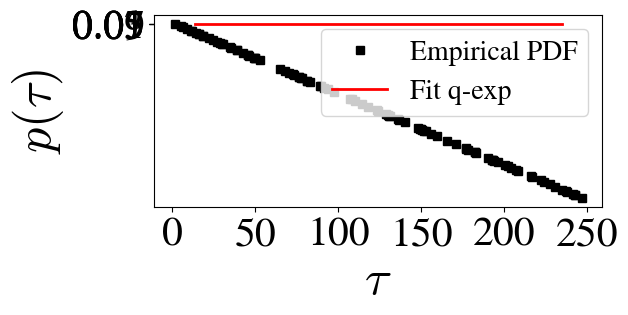

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as lt
from datetime import datetime, date, timedelta

np.random.seed(42)  # For reproducibility
delta_time = np.random.rand(100) * 250  # 100 random values between 0 and 250

# Sort the delta_time
delta_time.sort()
print("Max:", max(delta_time), "Min:", min(delta_time))

# Calculate max and min using numpy
max_val = np.max(delta_time)
min_val = np.min(delta_time)

# Calculate gap
gap = (max_val - min_val) / 10

# Create intervals
intervals = {'%f-%f' % (min_val + gap * x, min_val + gap * (x + 1)): 0 for x in range(10)}

# Example variables for p calculation (you need to define miu and q)
miu = 1.0  # example value
q = 0.5    # example value
n = len(delta_time)

# Calculate p
p = miu * (1 + (1 - q) * (-miu * delta_time)) ** (q / (1 - q))
p2 = []

# Populate p2 based on intervals
for i in intervals:
    p2.append(intervals[i] / gap * (1 / n))

# Calculate t for plotting
t = []
block = gap  # Use gap as block size in this context
for i in range(len(intervals)):
    t.append(min_val + (block * (i + 1 / 2)))

# Plotting
plt.figure(2)
lt.rcParams.update({"font.family": "STIXGeneral",
                    "font.size": 20,
                    "mathtext.fontset": "cm"})
plt.axes([.2, .52, .7, .4])
plt.plot(delta_time, p, 'sk', lw=11, label='Empirical PDF')
plt.plot(t, p2, '-r', lw=2, label='Fit q-exp')
plt.xticks(ticks=np.arange(0, 250.1, 50), fontsize=30)
plt.yticks(ticks=np.arange(0.01, 0.091, 0.02), fontsize=30)
plt.ylabel(r'$p(\tau)$', fontsize=36)
plt.xlabel(r'$\tau$', fontsize=36)
plt.legend()
plt.show()